In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [2]:
#loading dataset into dataframe
df = pd.read_csv('data/cleaned/train_merged.csv')

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,...,0.0,0.0,1638.0,112320.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,12.0
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,...,202500.0,215865.0,1638.0,202500.0,-739.0,-746.0,-746.0,-1076.0,365243.0,12.0


In [3]:
#table info
df_dtypes_nulls = pd.DataFrame({
    'missing': df.isnull().sum(),
    'data_types': df.dtypes
})

df_dtypes_nulls

,missing,data_types
SK_ID_CURR,0,int64
TARGET,0,int64
NAME_CONTRACT_TYPE,0,object
CODE_GENDER,0,object
FLAG_OWN_CAR,0,object
FLAG_OWN_REALTY,0,object
CNT_CHILDREN,0,int64
AMT_CREDIT,0,float64
AMT_ANNUITY,0,float64
AMT_GOODS_PRICE,0,float64


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
count,307510.000000,307510.000000,307510.000000,3.075100e+05,307510.000000,3.075100e+05,307510.000000,307510.000000,307510.000000,307510.000000,...,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000
mean,278181.038399,0.080729,0.417053,5.990270e+05,27108.577804,5.383971e+05,0.020868,-16037.019336,63815.254379,-4986.120965,...,11691.883921,12780.193814,691.666287,49230.818937,-373.483919,-505.097433,-3593.971020,-3557.151677,20353.493949,5.067152
std,102789.938288,0.272419,0.722122,4.024910e+05,14493.477922,3.692797e+05,0.013831,4363.974976,141275.948927,3522.892031,...,37268.268267,40591.753412,809.042183,60366.231181,27026.710845,26399.956894,4624.737278,5897.601899,79172.017766,5.927049
min,100002.000000,0.000000,0.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,0.000000
25%,189146.250000,0.000000,0.000000,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.750000,...,0.000000,0.000000,0.000000,0.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,0.000000
50%,278202.500000,0.000000,0.000000,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.500000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.750000,0.000000,1.000000,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,1638.000000,112320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
max,456255.000000,1.000000,19.000000,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,337500.000000,337500.000000,1638.000000,337500.000000,365243.000000,365243.000000,358.000000,365243.000000,365243.000000,12.000000


Clients % with payment difficulty: 0.9192709180189262


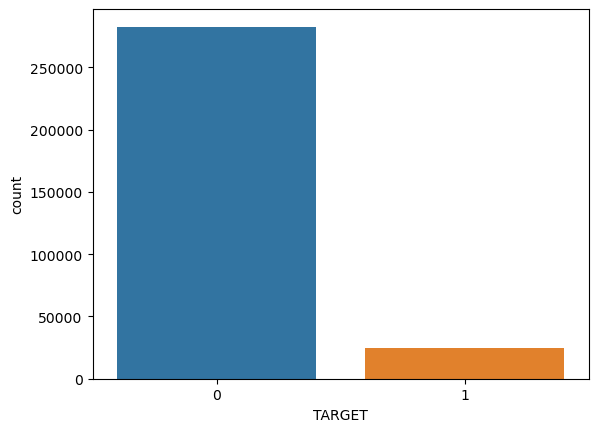

In [5]:
#plotting proportion of 1s and 0s on TARGET column
sns.countplot(data=df,x='TARGET')
target_0 = df.query('TARGET==0').TARGET.count()/df.shape[0]
print(f'Clients % with payment difficulty: {target_0}')
plt.show()

## Correlation

In [3]:
#defining numerical and categorical columns
numeric_columns = df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

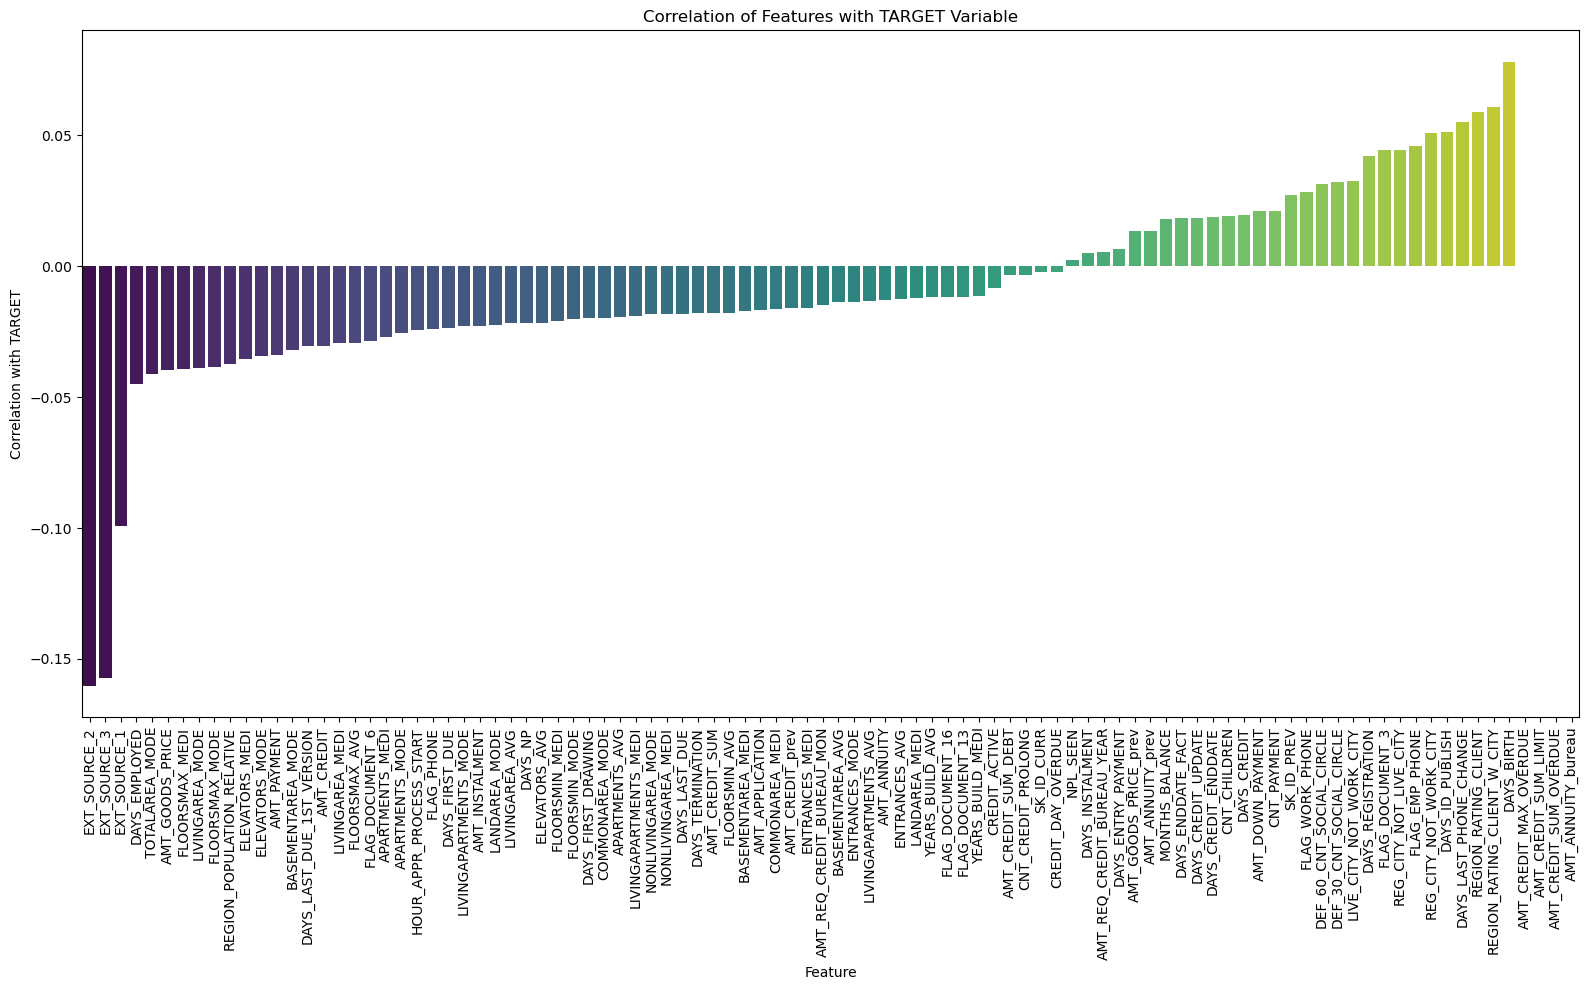

In [7]:
#correlation matrix regarting TARGET (numeric_columns)
correlation_matrix = numeric_columns.corr()

correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.drop('TARGET').sort_values()

plt.figure(figsize=(16, 10))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation with TARGET')
plt.title('Correlation of Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [4]:
#printing out correlation values
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

sorted_correlation

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
EXT_SOURCE_1                   0.099153
DAYS_BIRTH                     0.078241
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045983
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044345
DAYS_REGISTRATION              0.041975
TOTALAREA_MODE                 0.041036
AMT_GOODS_PRICE                0.039629
FLOORSMAX_MEDI                 0.039156
LIVINGAREA_MODE                0.038797
FLOORSMAX_MODE                 0.038376
REGION_POPULATION_RELATIVE     0.037228
ELEVATORS_MEDI                 0.035551
ELEVATORS_MODE                 0.034219
AMT_PAYMENT                    0.033915
LIVE_CITY_NOT_WORK_CITY        0.032518


In [6]:
#dropping columns with "no impact"values
columns_to_drop = sorted_correlation[(sorted_correlation.isnull())].index
df = df.drop(columns=columns_to_drop)

In [7]:
numeric_columns = numeric_columns.drop(columns=columns_to_drop)

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,...,0.0,0.0,1638.0,112320.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,12.0
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,...,202500.0,215865.0,1638.0,202500.0,-739.0,-746.0,-746.0,-1076.0,365243.0,12.0


In [9]:
df.shape

(307510, 108)

## Hypothesis Testing

In [10]:
numeric_columns = df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

In [14]:
#hypothesis tests (chi-square for categorical data; t-test for numerical data)
from scipy.stats import chi2_contingency, ttest_ind

df_new = pd.read_csv('data/cleaned/train_merged.csv')

def chi_square_test(data, col_name):
    contingency_table = pd.crosstab(data['TARGET'], data[col_name])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nHypothesis: Chi-square Test")
    print("Chi-square value:", chi2)
    print("p-value:", p)
    if p < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")
        
def t_test(data, col_name):
    default_group = data[data['TARGET'] == 1][col_name]
    non_default_group = data[data['TARGET'] == 0][col_name]
    t_stat, p_val = ttest_ind(default_group, non_default_group)
    print("\nHypothesis: Independent Samples t-test")
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
    if p_val < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")

#implementing hypothesis tests for each single column (test)     
chi_square_test(df_new, 'CODE_GENDER')
chi_square_test(df_new, 'WEEKDAY_APPR_PROCESS_START')
t_test(df_new, 'FLAG_PHONE')
t_test(df_new, 'AMT_CREDIT_SUM_OVERDUE')


Hypothesis: Chi-square Test
Chi-square value: 920.8393868201762
p-value: 1.1022187444525942e-200
Result: Reject null hypothesis (H0)

Hypothesis: Chi-square Test
Chi-square value: 15.389131088939056
p-value: 0.017436757720257896
Result: Reject null hypothesis (H0)

Hypothesis: Independent Samples t-test
t-statistic: -13.205475503730094
p-value: 8.36478774753031e-40
Result: Reject null hypothesis (H0)

Hypothesis: Independent Samples t-test
t-statistic: nan
p-value: nan
Result: Fail to reject null hypothesis (H0)


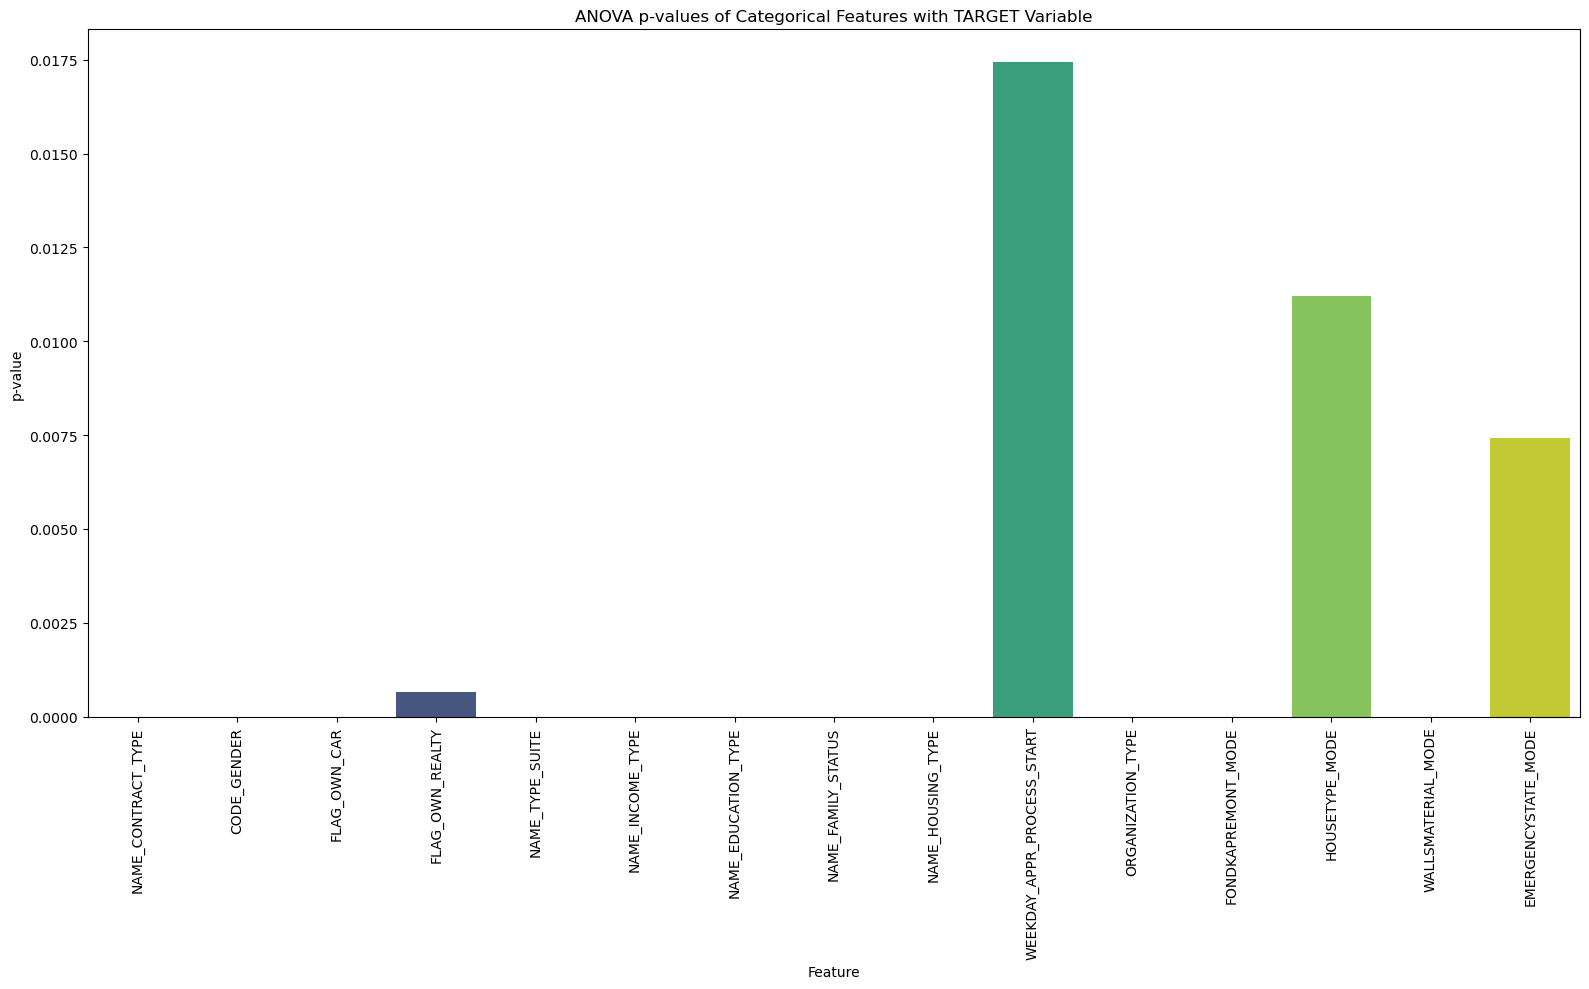

In [11]:
#hypothesis testing (calculating p values for every categorical data)
from scipy.stats import f_oneway

cat_correlation = {}
for col in categorical_columns:
    groups = df.groupby(col)['TARGET'].apply(list)
    f, p = f_oneway(*groups)
    cat_correlation[col] = p

cat_correlation_series = pd.Series(cat_correlation)

plt.figure(figsize=(16, 10))
sns.barplot(x=cat_correlation_series.index, y=cat_correlation_series.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.title('ANOVA p-values of Categorical Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [16]:
cat_correlation_series

NAME_CONTRACT_TYPE             7.848362e-66
CODE_GENDER                   5.549265e-201
FLAG_OWN_CAR                   8.498837e-34
FLAG_OWN_REALTY                6.516145e-04
NAME_TYPE_SUITE                1.253514e-07
NAME_INCOME_TYPE              5.357098e-267
NAME_EDUCATION_TYPE           1.055419e-219
NAME_FAMILY_STATUS            6.364572e-107
NAME_HOUSING_TYPE              9.590671e-89
WEEKDAY_APPR_PROCESS_START     1.743585e-02
ORGANIZATION_TYPE             7.153462e-300
FONDKAPREMONT_MODE             5.379696e-18
HOUSETYPE_MODE                 1.119312e-02
WALLSMATERIAL_MODE             1.502351e-22
EMERGENCYSTATE_MODE            7.412129e-03
dtype: float64

In [12]:
#dropping columns on which "failed to reject H0"
for col in categorical_columns:
    if cat_correlation[col] > 0.05:  
        df = df.drop(columns=[col])

In [18]:
#printing out columns with the least p values ("mostly impacting values")
cat_min_p = cat_correlation_series.nsmallest(5)

for col, p_value in cat_min_p.items():
    print(f"Column: {col}, p-value: {p_value}")

Column: ORGANIZATION_TYPE, p-value: 7.15346239715798e-300
Column: NAME_INCOME_TYPE, p-value: 5.357098340255961e-267
Column: NAME_EDUCATION_TYPE, p-value: 1.0554191813822618e-219
Column: CODE_GENDER, p-value: 5.5492654671457945e-201
Column: NAME_FAMILY_STATUS, p-value: 6.364572117557627e-107


In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,...,0.0,0.0,1638.0,112320.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,12.0
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,...,202500.0,215865.0,1638.0,202500.0,-739.0,-746.0,-746.0,-1076.0,365243.0,12.0


In [20]:
df.shape

(307510, 108)

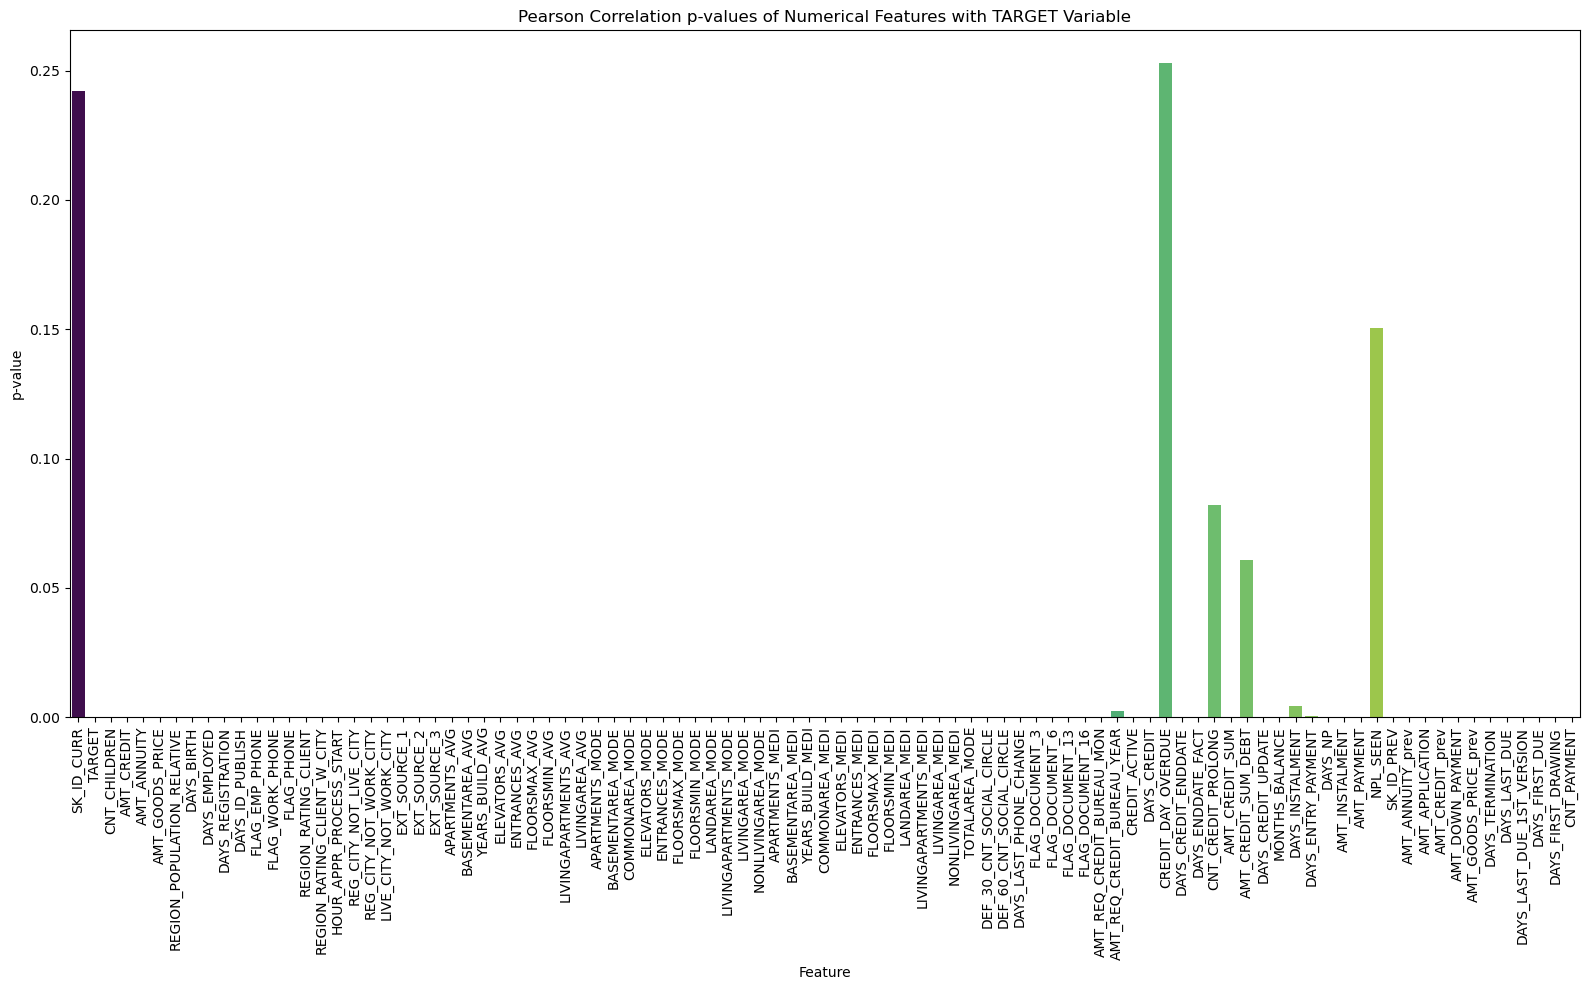

In [14]:
#hypothesis testing (calculating p values for every numerical data)
from scipy.stats import pearsonr

num_correlation = {}
for col in numeric_columns:
    r, p = pearsonr(df[col], df['TARGET'])
    num_correlation[col] = p

num_correlation_series = pd.Series(num_correlation)

plt.figure(figsize=(16, 10))
sns.barplot(x=num_correlation_series.index, y=num_correlation_series.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.title('Pearson Correlation p-values of Numerical Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [22]:
#dropping columns on which "failed to reject H0"
for col in num_correlation:
    if num_correlation[col] > 0.05:  
        df = df.drop(columns=[col])

In [23]:
#printing out columns with the least p values ("mostly impacting values")
num_min_p = num_correlation_series.nsmallest(10)

for col, p_value in num_min_p.items():
    print(f"Column: {col}, p-value: {p_value}")

Column: TARGET, p-value: 0.0
Column: DAYS_BIRTH, p-value: 0.0
Column: EXT_SOURCE_1, p-value: 0.0
Column: EXT_SOURCE_2, p-value: 0.0
Column: EXT_SOURCE_3, p-value: 0.0
Column: REGION_RATING_CLIENT_W_CITY, p-value: 2.0843345452092572e-250
Column: REGION_RATING_CLIENT, p-value: 2.179776805862259e-234
Column: DAYS_LAST_PHONE_CHANGE, p-value: 3.1881613048982126e-206
Column: DAYS_ID_PUBLISH, p-value: 2.476480289049112e-179
Column: REG_CITY_NOT_WORK_CITY, p-value: 3.84024929750018e-176


In [24]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
0,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,1638.0,112320.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,12.0
4,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,...,202500.0,215865.0,1638.0,202500.0,-739.0,-746.0,-746.0,-1076.0,365243.0,12.0


In [26]:
df.shape

(307510, 103)

# Hypothesis:

### Client's EXT_SOURCE 1-2-3, gender, income, organization and education types are the aspects which mostly impacts on client's difficulties facing while paying the credit

In [27]:
#saving table into csv
df.to_csv('data/cleaned/train_filtered.csv', index=False)